In [0]:
!pip install -q tensorflow==2.1.0

In [0]:
import pandas as pd
import numpy as np

import seaborn as sns

In [0]:
df = pd.read_csv('fake_reg.csv')

In [113]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


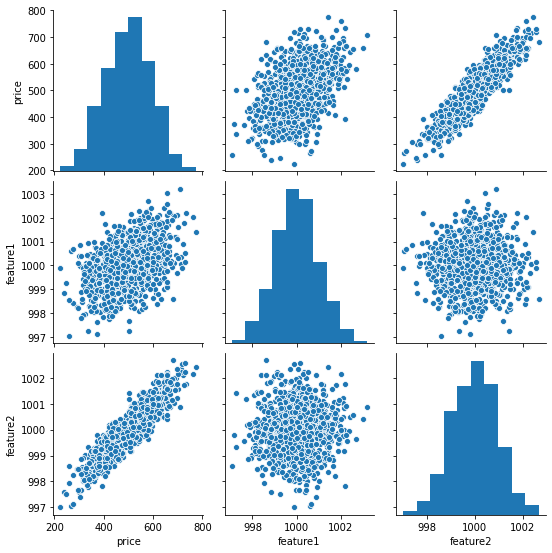

In [114]:
sns.pairplot(df)

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X = df[['feature1', 'feature2']].values

In [0]:
y = df['price'].values

In [118]:
X[:6]

array([[ 999.78755752,  999.7660962 ],
       [ 998.86161491, 1001.04240315],
       [1000.07026691,  998.84401463],
       [ 999.9522513 , 1000.44094031],
       [1000.44601093, 1000.33853129],
       [ 999.69318368, 1000.62800622]])

In [119]:
y[:6]

array([461.52792939, 548.13001146, 410.29716167, 540.38221981,
       546.02455292, 542.9836716 ])

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [121]:
X_train.shape

(700, 2)

In [122]:
X_test.shape

(300, 2)

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [124]:
help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing._data:

class MinMaxScaler(sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  Transform features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  The transformation is calculated as::
 |  
 |      X_scaled = scale * X + min - X.min(axis=0) * scale
 |      where scale = (max - min) / (X.max(axis=0) - X.min(axis=0))
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_scaler>`.
 |  
 |  Parameters
 |  ----------
 |  feature_range : tuple (min, max), de

In [0]:
scaler = MinMaxScaler()

In [126]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [0]:
X_train = scaler.transform(X_train)

In [0]:
X_test = scaler.transform(X_test)

In [129]:
X_train.max()

1.0

In [130]:
X_train.min()

0.0

In [131]:
X_train.mean()

0.5036347891643072

In [132]:
X_test.max()

1.0186515935232023

In [133]:
X_test.min()

-0.014108392024496652

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [135]:
help(Sequential)

Help on class Sequential in module tensorflow.python.keras.engine.sequential:

class Sequential(tensorflow.python.keras.engine.training.Model)
 |  Linear stack of layers.
 |  
 |  Arguments:
 |      layers: list of layers to add to the model.
 |  
 |  Example:
 |  
 |  ```python
 |  # Optionally, the first layer can receive an `input_shape` argument:
 |  model = Sequential()
 |  model.add(Dense(32, input_shape=(500,)))
 |  # Afterwards, we do automatic shape inference:
 |  model.add(Dense(32))
 |  
 |  # This is identical to the following:
 |  model = Sequential()
 |  model.add(Dense(32, input_dim=500))
 |  
 |  # And to the following:
 |  model = Sequential()
 |  model.add(Dense(32, batch_input_shape=(None, 500)))
 |  
 |  # Note that you can also omit the `input_shape` argument:
 |  # In that case the model gets built the first time you call `fit` (or other
 |  # training and evaluation methods).
 |  model = Sequential()
 |  model.add(Dense(32))
 |  model.add(Dense(32))
 |  model.com

In [136]:
help(Dense)

Help on class Dense in module tensorflow.python.keras.layers.core:

class Dense(tensorflow.python.keras.engine.base_layer.Layer)
 |  Just your regular densely-connected NN layer.
 |  
 |  `Dense` implements the operation:
 |  `output = activation(dot(input, kernel) + bias)`
 |  where `activation` is the element-wise activation function
 |  passed as the `activation` argument, `kernel` is a weights matrix
 |  created by the layer, and `bias` is a bias vector created by the layer
 |  (only applicable if `use_bias` is `True`).
 |  
 |  Note: If the input to the layer has a rank greater than 2, then
 |  it is flattened prior to the initial dot product with `kernel`.
 |  
 |  Example:
 |  
 |  ```python
 |  # as first layer in a sequential model:
 |  model = Sequential()
 |  model.add(Dense(32, input_shape=(16,)))
 |  # now the model will take as input arrays of shape (*, 16)
 |  # and output arrays of shape (*, 32)
 |  
 |  # after the first layer, you don't need to specify
 |  # the size 

In [0]:
# First way of creating Keras model with Sequential
model = Sequential([Dense(4, activation='relu'), Dense(2, activation='relu'), Dense(1)])

In [0]:
# Second (Preferred) way of creating Keras model with Sequential
model = Sequential()

model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))

# final node

model.add(Dense(1))

model.compile(optimizer='rmsprop', loss='mse')

In [138]:
model.fit(x=X_train, y=y_train, epochs=250)

Train on 700 samples
Epoch 1/250
700/700 [==============================] - 0s 576us/sample - loss: 256714.5625
Epoch 2/250
700/700 [==============================] - 0s 47us/sample - loss: 256689.4177
Epoch 3/250
700/700 [==============================] - 0s 50us/sample - loss: 256667.2988
Epoch 4/250
700/700 [==============================] - 0s 46us/sample - loss: 256642.6704
Epoch 5/250
700/700 [==============================] - 0s 47us/sample - loss: 256599.3234
Epoch 6/250
700/700 [==============================] - 0s 47us/sample - loss: 256546.9039
Epoch 7/250
700/700 [==============================] - 0s 47us/sample - loss: 256487.0897
Epoch 8/250
700/700 [==============================] - 0s 48us/sample - loss: 256416.1194
Epoch 9/250
700/700 [==============================] - 0s 46us/sample - loss: 256331.2845
Epoch 10/250
700/700 [==============================] - 0s 44us/sample - loss: 256231.5219
Epoch 11/250
700/700 [==============================] - 0s 48us/sample - loss

In [139]:
# To check history of corresponding losses
model.history.history

{'loss': [256714.5625,
  256689.41767857142,
  256667.2988392857,
  256642.67035714287,
  256599.32339285716,
  256546.90392857144,
  256487.08973214286,
  256416.119375,
  256331.2844642857,
  256231.521875,
  256114.4863392857,
  255979.24357142858,
  255823.05973214286,
  255643.2542857143,
  255438.81035714285,
  255206.74044642856,
  254944.68392857144,
  254650.56357142856,
  254323.85392857142,
  253958.59589285715,
  253553.07035714286,
  253104.7675,
  252611.56142857144,
  252070.20964285714,
  251476.86919642857,
  250829.54267857142,
  250124.33410714284,
  249358.821875,
  248532.55660714285,
  247639.6066964286,
  246670.52089285714,
  245629.78839285715,
  244516.2257142857,
  243321.76080357144,
  242044.82303571427,
  240680.38910714287,
  239216.5074107143,
  237667.77616071427,
  236034.32446428572,
  234284.645,
  232430.46071428573,
  230473.72848214285,
  228411.5838392857,
  226234.619375,
  223945.58491071427,
  221534.9786607143,
  218999.37276785713,
  216350.

In [0]:
loss_df = pd.DataFrame(model.history.history)

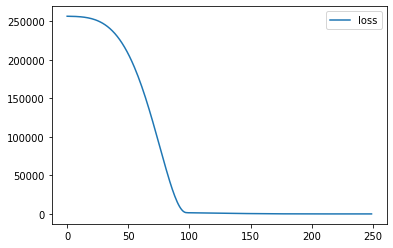

In [141]:
loss_df.plot()

In [142]:
# if you want to evaluate the test, it will return the loss (mse)
model.evaluate(X_test, y_test, verbose=0)

24.964621353149415

In [143]:
model.evaluate(X_train, y_train, verbose=0)

23.998349424089703

In [0]:
test_predictions = model.predict(X_test)

In [145]:
test_predictions

array([[405.1212 ],
       [623.32086],
       [591.9039 ],
       [572.0567 ],
       [366.52853],
       [578.9815 ],
       [514.9285 ],
       [458.89877],
       [549.0797 ],
       [447.30792],
       [611.5681 ],
       [548.6733 ],
       [418.93372],
       [408.71725],
       [650.94226],
       [437.10336],
       [508.20096],
       [659.76587],
       [662.38226],
       [565.3037 ],
       [334.11234],
       [444.66077],
       [382.3904 ],
       [378.5895 ],
       [566.3948 ],
       [610.4142 ],
       [532.20386],
       [427.68005],
       [655.2609 ],
       [413.88318],
       [442.43176],
       [484.94107],
       [438.23312],
       [681.649  ],
       [424.5384 ],
       [417.54535],
       [501.66052],
       [550.2679 ],
       [509.59644],
       [395.2592 ],
       [618.3583 ],
       [416.43668],
       [604.22235],
       [445.73175],
       [501.8001 ],
       [581.4293 ],
       [668.7149 ],
       [490.1873 ],
       [318.39825],
       [485.24753],


In [0]:
# turning them in Pandas Series
test_predictions = pd.Series(test_predictions.reshape(300,))

In [147]:
test_predictions

0      405.121185
1      623.320862
2      591.903870
3      572.056702
4      366.528534
          ...    
295    528.879944
296    515.254456
297    609.428040
298    416.750183
299    410.733398
Length: 300, dtype: float32

In [0]:
pred_df = pd.DataFrame(y_test, columns=['Test True Y'])

In [149]:
pred_df

,Test True Y
0,402.296319
1,624.156198
2,582.455066
3,578.588606
4,371.224104
...,...
295,525.704657
296,502.909473
297,612.727910
298,417.569725


In [0]:
pred_df = pd.concat([pred_df, test_predictions], axis=1)

In [151]:
pred_df

,Test True Y,0
0,402.296319,405.121185
1,624.156198,623.320862
2,582.455066,591.903870
3,578.588606,572.056702
4,371.224104,366.528534
...,...,...
295,525.704657,528.879944
296,502.909473,515.254456
297,612.727910,609.428040
298,417.569725,416.750183


In [0]:
pred_df.columns = ['Test True Y', 'Model Predictions']

In [153]:
pred_df

,Test True Y,Model Predictions
0,402.296319,405.121185
1,624.156198,623.320862
2,582.455066,591.903870
3,578.588606,572.056702
4,371.224104,366.528534
...,...,...
295,525.704657,528.879944
296,502.909473,515.254456
297,612.727910,609.428040
298,417.569725,416.750183


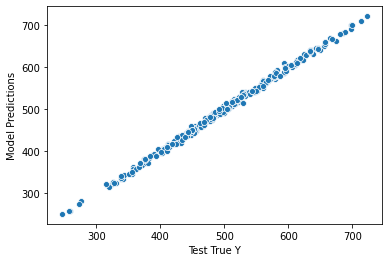

In [154]:
sns.scatterplot(x='Test True Y', y='Model Predictions', data=pred_df)

In [0]:
from sklearn.metrics import  mean_absolute_error, mean_squared_error

In [156]:
# if you want to evaluate this through various methods
mean_absolute_error(pred_df['Test True Y'], pred_df['Model Predictions'])

4.001017140229657

In [157]:
df

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531
...,...,...,...
995,476.526078,1000.018988,999.672732
996,457.313186,998.855379,1000.020026
997,456.720992,1001.451646,998.847606
998,403.315576,1000.771023,998.562851


In [158]:
df.describe()

,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


In [159]:
mean_squared_error(pred_df['Test True Y'], pred_df['Model Predictions'])

24.96462495460446

In [160]:
# if you want to take mean_root_error
mean_squared_error(pred_df['Test True Y'], pred_df['Model Predictions']) ** 0.5

4.996461243180463

In [0]:
# if you want to test new features, you have to scale it
new_gem = [[998, 1000]]

In [162]:
scaler.transform(new_gem)

array([[0.14117652, 0.53968792]])

In [0]:
new_gem = scaler.transform(new_gem)

In [164]:
model.predict(new_gem)

array([[419.5814]], dtype=float32)

In [0]:
from tensorflow.keras.models import load_model

In [0]:
model.save('my_gem_model.h5')

In [167]:
later_model = load_model('my_gem_model.h5')

In [169]:
later_model.predict(new_gem)

array([[419.5814]], dtype=float32)